In [8]:
import os
import shutil

original_dataset_dir = '/Users/oscar/Downloads/dogs-vs-cats/train/'

base_dir = '/Users/oscar/Downloads/cats_and_dogs_small'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)

test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)

# Copy the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,  fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy the first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [9]:
# Sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [10]:
# instantiating a small convnet for dogs vs. cats classification

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch , label_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', label_batch.shape)
    break

Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20,)


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50
)

/var/folders/5k/1gm98l3s7l541jt9yyg0qb6w0000gn/T/ipykernel_45604/312136197.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 83s 812ms/step - loss: 0.6935 - acc: 0.5320 - val_loss: 0.6816 - val_acc: 0.5530
Epoch 2/30
100/100 [==============================] - 78s 778ms/step - loss: 0.6575 - acc: 0.6215 - val_loss: 0.6466 - val_acc: 0.6080
Epoch 3/30
100/100 [==============================] - 77s 770ms/step - loss: 0.6037 - acc: 0.6835 - val_loss: 0.6067 - val_acc: 0.6740
Epoch 4/30
100/100 [==============================] - 79s 786ms/step - loss: 0.5566 - acc: 0.7280 - val_loss: 0.5839 - val_acc: 0.6910
Epoch 5/30
100/100 [==============================] - 85s 848ms/step - loss: 0.5195 - acc: 0.7365 - val_loss: 0.5608 - val_acc: 0.6990
Epoch 6/30
100/100 [==============================] - 80s 798ms/step - loss: 0.5005 - acc: 0.7485 - val_loss: 0.5574 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 85s 844ms/step - loss: 0.4693 - acc: 0.7715 - val_loss: 0.5569 - val_acc: 0.7090
Epoch 8/30
100/100 [==============================] - 8

In [15]:
# saving the model
model.save('cats_vs_dogs_small_v1.h5')

In [32]:
import tensorflow as tf
from tensorflow import keras

# Load the Keras model
model = keras.models.load_model('cats_vs_dogs_small_v1.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('cats_vs_dogs_small_v1.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/5k/1gm98l3s7l541jt9yyg0qb6w0000gn/T/tmpknkfp3al/assets


INFO:tensorflow:Assets written to: /var/folders/5k/1gm98l3s7l541jt9yyg0qb6w0000gn/T/tmpknkfp3al/assets
2023-06-26 22:50:02.942872: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-06-26 22:50:02.943701: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-06-26 22:50:02.965286: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/5k/1gm98l3s7l541jt9yyg0qb6w0000gn/T/tmpknkfp3al
2023-06-26 22:50:02.974640: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-06-26 22:50:02.974683: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/5k/1gm98l3s7l541jt9yyg0qb6w0000gn/T/tmpknkfp3al
2023-06-26 22:50:03.003947: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-06-26 22:50:03.009605: I tensorflow/cc/saved_model/load

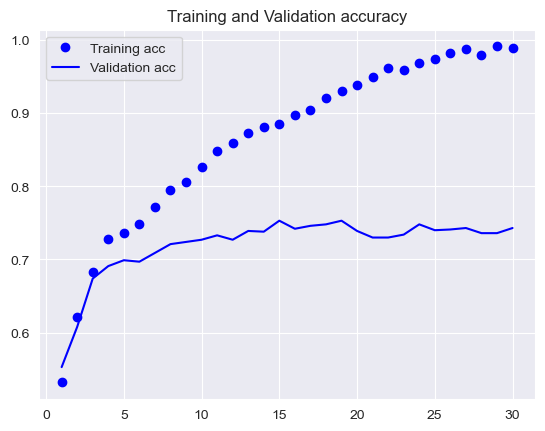

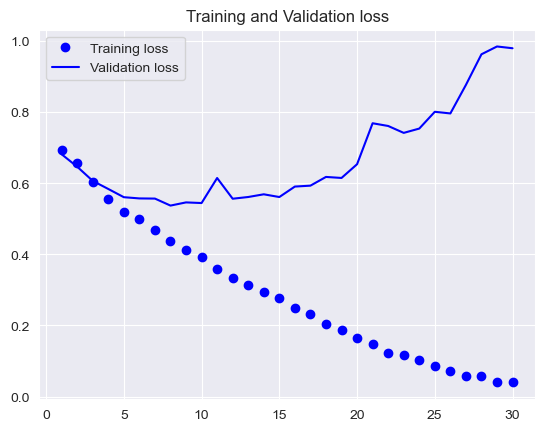

In [33]:
# displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

## Using Data Augmentation

In [34]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [60]:
from PIL import Image
from matplotlib import image

In [ ]:
from keras_preprocessing.image import load_img, img_to_array


fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fname[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[10]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [39]:
# Defining a new convnet that includes dropout
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [40]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [43]:
# Training the convnet using data-augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_datagen = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
history1 = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

/var/folders/5k/1gm98l3s7l541jt9yyg0qb6w0000gn/T/ipykernel_45604/1310431958.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 102s 993ms/step - loss: 0.6923 - acc: 0.5260 - val_loss: 0.6711 - val_acc: 0.5760
Epoch 2/100
100/100 [==============================] - 98s 979ms/step - loss: 0.6699 - acc: 0.5735 - val_loss: 0.6534 - val_acc: 0.6190
Epoch 3/100
100/100 [==============================] - 90s 902ms/step - loss: 0.6387 - acc: 0.6380 - val_loss: 0.6594 - val_acc: 0.5870
Epoch 4/100
100/100 [==============================] - 111s 1s/step - loss: 0.5986 - acc: 0.6590 - val_loss: 0.6145 - val_acc: 0.6580
Epoch 5/100
100/100 [==============================] - 107s 1s/step - loss: 0.5659 - acc: 0.7060 - val_loss: 0.6353 - val_acc: 0.6460
Epoch 6/100
100/100 [==============================] - 93s 932ms/step - loss: 0.5477 - acc: 0.7175 - val_loss: 0.5846 - val_acc: 0.6850
Epoch 7/100
100/100 [==============================] - 104s 1s/step - loss: 0.5255 - acc: 0.7325 - val_loss: 0.6587 - val_acc: 0.6450
Epoch 8/100
100/100 [==============================] 

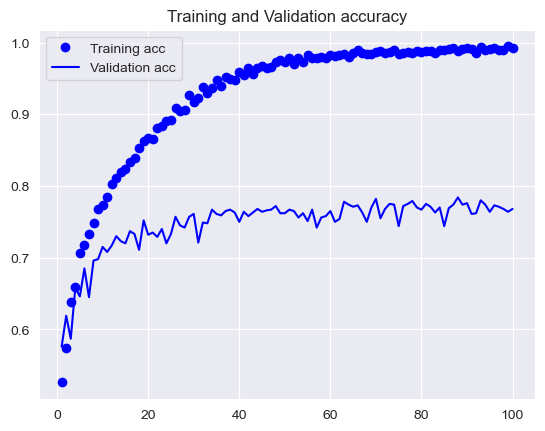

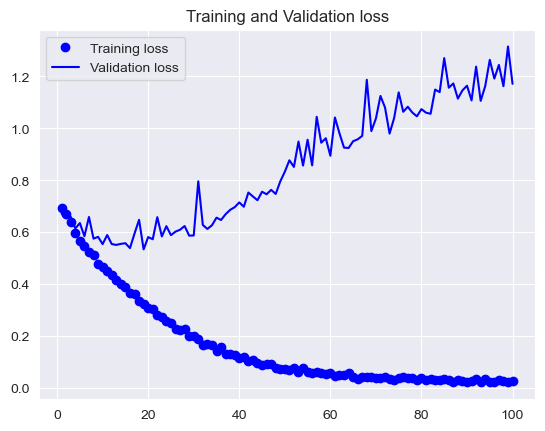

In [56]:
acc_1 = history1.history['acc']
val_acc_1 = history1.history['val_acc']
loss_1 = history1.history['loss']
val_loss_1 = history1.history['val_loss']

epochs = range(1, len(acc_1) + 1)

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [53]:
# saving the model
model.save('cats_vs_dogs_small_v2.h5')

In [54]:
import tensorflow as tf
from tensorflow import keras

# Load the Keras model
model = keras.models.load_model('cats_vs_dogs_small_v2.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('cats_vs_dogs_small_v2.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/5k/1gm98l3s7l541jt9yyg0qb6w0000gn/T/tmpc45rjzcm/assets


INFO:tensorflow:Assets written to: /var/folders/5k/1gm98l3s7l541jt9yyg0qb6w0000gn/T/tmpc45rjzcm/assets
2023-06-27 16:59:34.728109: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-06-27 16:59:34.729986: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-06-27 16:59:34.741856: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/5k/1gm98l3s7l541jt9yyg0qb6w0000gn/T/tmpc45rjzcm
2023-06-27 16:59:34.755300: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-06-27 16:59:34.755354: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/5k/1gm98l3s7l541jt9yyg0qb6w0000gn/T/tmpc45rjzcm
2023-06-27 16:59:34.803596: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-06-27 16:59:35.111336: I tensorflow/cc/saved_model/loader.cc:213] Running initialization